## Logistic Regression

Logistic Regression Adımları:

    1-Import Libraries
    
    2-Prepare Dataset
    
    3-Create Logistic Regression Model
    
    4-Instantiate Model(input_dim = 2828 # size of image pxpx | output_dim = 10 # labels 0,1,2,3,4,5,6,7,8,9 | create model)
    
    5-Instantiate Loss (Cross entropy loss)
    
    6-Instantiate Optimizer (SGD Optimizer)
    
    7-Traning the Model

    8-Prediction
    
Bu adımlar uygulanarak Pytorch kütüphanesi kullanılarak Logistic Regression algoritması gerçekleştirilecektir.

In [1]:
# Import Libraries
import torch
import numpy as np
import torch.nn as nn
from torch.autograd import Variable  #Gradient hesabı yapacağımız için Variable'lere ihtiyaç vardır.
from torch.utils.data import DataLoader
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from torch.utils.data import DataLoader satırını tanımlama sebebim, elimizde bulunan train ve test veri setlerini Pytorch'da kullanılabilir hale getirmektir. Yani DataLoader'e vericez ve çıkan output Pytorch'da logistic regression modelini eğitebilmemiz için gerekli olan output olacaktır.

Veri seti olarak MNIST kullanacağız. MNIST veri setinin içerisinde 28x28'lik resimler bulunmaktadır ve toplamda 784 piksele sahiptir. Bu resimler toplamda 10 farklı class'a aittir. Bu class'larda 0'dan 9'a kadar el yazısı ile yazılmış rakamlar bulunmaktadır. Resimler gray-scale'dir yani gri tonlarındadırlar.

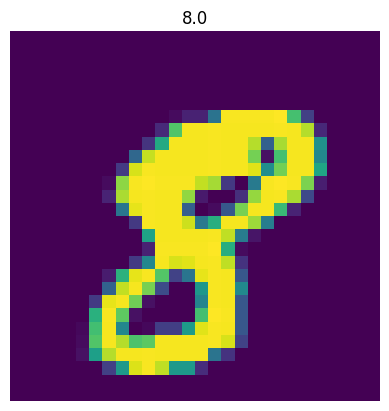

In [2]:
# Prepare Dataset
# load data
train = pd.read_csv(r"C:\Users\raziy\OneDrive\Masaüstü\Caner hocanın attıkları\KURS ÇALIŞMALARIM\Python ve Derin Öğrenme Pytorch ile Derin Öğrenme (5.3)\3-LogisticRegression\train.csv",dtype = np.float32)

# split data into features(pixels) and labels(numbers from 0 to 9)
targets_numpy = train.label.values
features_numpy = train.loc[:,train.columns != "label"].values/255 # normalization

# train test split. Size of train data is 80% and size of test data is 20%. 
features_train, features_test, targets_train, targets_test = train_test_split(features_numpy,
                                                                             targets_numpy,
                                                                             test_size = 0.2,
                                                                             random_state = 42) 

# create feature and targets tensor for train set. As you remember we need variable to accumulate gradients. Therefore first we create tensor, then we will create variable
featuresTrain = torch.from_numpy(features_train)
targetsTrain = torch.from_numpy(targets_train).type(torch.LongTensor) # data type is long

# create feature and targets tensor for test set.
featuresTest = torch.from_numpy(features_test)
targetsTest = torch.from_numpy(targets_test).type(torch.LongTensor) # data type is long

# batch_size, epoch and iteration
batch_size = 100
n_iters = 10000
num_epochs = n_iters / (len(features_train) / batch_size)
num_epochs = int(num_epochs)

# Pytorch train and test sets
train = torch.utils.data.TensorDataset(featuresTrain,targetsTrain)
test = torch.utils.data.TensorDataset(featuresTest,targetsTest)

# data loader
train_loader = DataLoader(train, batch_size = batch_size, shuffle = False)
test_loader = DataLoader(test, batch_size = batch_size, shuffle = False)

# visualize one of the images in data set
plt.imshow(features_numpy[10].reshape(28,28))
plt.axis("off")
plt.title(str(targets_numpy[10]))
plt.savefig('graph.png')
plt.show()

targets_numpy = train.label.values satırı ile class label'ları targets_numpy isimli değişken içerisine depolanmıştır.

features_numpy = train.loc[:,train.columns != "label"].values/255  satırında label sütunu dışındaki sütunların değerleri alınmıştır. Ve bu işlem yapılırken alınan değerler 255'e bölünerek (En yüksek piksel değeri 255 olduğundan) değerler 0 ile 1 aralığına çekilmiştir.

Yani targets_numpy değişkeninde 0'dan 9'a kadar rakamların bulunduğu class'lar depolanmıştır.  feature_numpy değişkeninde ise label dışındaki feature'ler depolanmıştır. Yani piksel değerleri depolanmıştır.

features_train, features_test, targets_train, targets_test = train_test_split(features_numpy,
                                                                             targets_numpy,
                                                                             test_size = 0.2,
                                                                             random_state = 42)  
                                                                             
satırında features_train ifadesi x_train'i, features_test ifadesi x_test'i, targets_train ifadesi y_train ve targets_test ifadesi y_test'i temsil etmektedir.                                                                

featuresTrain = torch.from_numpy(features_train)

targetsTrain = torch.from_numpy(targets_train).type(torch.LongTensor) # data type is long

featuresTest = torch.from_numpy(features_test)

targetsTest = torch.from_numpy(targets_test).type(torch.LongTensor) # data type is long

Satırlarında yapılan işlemler: Pytorch kütüphanesinde gradient hesabı yapabilmek ve bunları biriktirebilmek için variable'lere ihtiyaç vardır. Bunun için öncelikle elimizde bulunan feature ve target'ları kullanarak tensor'leri elde etmeliyiz. 
Tensor from_numpy metodu kullanılarak elde edilebilir. 

featuresTrain = torch.from_numpy(features_train) satırında feature_train numpy'ı tensor'e çevrilerek featuresTrain değişkenine atanmıştır.

<font color="Chocolate"><br>
batch_size veriyi kaça bölerek train edeceğimizdir. örnek vereyim. 1000 tane sample olsun ve eğer bunu 10 tane gruba alırsak her bir grubun içerisinde 100 tane eleman olur ve bu 10 grubu sırasıyla train edebiliriz. batch_size denilen aslında grup size'dır. Yani 100 batch_size'dır. Bir train veri setinde train edebilmemiz için az önceki örnek üzerinden ifade edecek olursam 10 kerede train edilir.
    
<font color="Chocolate"><br>
Başka bir örnek üzerinden açıklayayım. Mesela batch_size 100 olsun. 336 tane gruba sahibiz. Bunun anlamı 336 kerede 1 veri setini train ediyoruz anlamındadır. Toplamda 33600 tane sample'ı 1 kere train etmiş oluyoruz. Burada vurgulanan 1 değeri epoch sayısıdır.
    
<font color="Chocolate"><br>
Mesela 1 epoch'un anlamı train veri setini kullanarak tam 1 kere training işlemini gerçekleştireceğimizdir.

<font color="Chocolate"><br>
Mesela 5 epoch dediğimizde aynı veri setini kullanarak aynı veri setini 5 kere train edeceğimiz anlamına gelmektedir. AYnı veri setini 5 kere train etmemizin sebebi, her training sürecinde parametreler güncellendiği için ilk seferde loss çok yüksek çıkacaktır. Bu nedenle bir veri setini loss değerini azaltana kadar sürekli train etmeliyiz. Bunun sayısınıda epoch belirlemektedir.

<font color="Chocolate"><br>
100 tane smaple'den oluşan bir veri seti olsun. batch_size 50 olsun. epoch değeri de 2 olsun. İşlemler şöyle gerçekleştirilir:
1.epoch'un içerisinde veri seti her birinde 50 sample olacak şekilde ikiye bölünür. 50 tane resim train edilir, parametreler güncellenir ve diğer 50 resim de train edilir, parametreler güncellenir. 100 tane resim train edildikten sonra 2.epoch başlar. Bu epoch'dada aynı işlemler geçrekleştirilir. 100 sample'den oluşan aynı veri seti tekrardan 50'şer tane olmak üzere ikiye bölünür. İlk süreçte 50 resim train edilir ve sonra diğer 50 resim train edilir. Bu şekilde yapılma sebebi, train denilen işlem weight'lerin update edilmesidir yani neural network'tede, deep learning'te de çok fazla parametre olduğu zaman eğer bunları bölmezsek 1 kerede handle edemeyeceğimiz kadar fazla veriye sahip olmuş oluruz. Bu durum training işlemini olumsuz etkiler.

Veri setinde 33600 tane train edilmesi gereken sample var. batch_size değeri 100 seçilmiştir. epoch değeri de 29 seçilmiştir. Bu durumda veri 29 kere train edilecektir. Bunu yapabilmek için kaç tane iterasyona ihtiyacımız olduğunu hesaplayalım. 

training data'sını 1 kere train etmek için 33600 tane sample var. Bu sample'leri 336 tane gruba böldük. Çünkü batch_size değeri 100 seçilmişti. Bu nedenle 1 epoch 336 iterasyon sürüyor. 29 tane epoch var ise toplamda 9744 tane iterasyon yapmalıyız. Yani iterasyon sayısını 10000 seçebiliriz.
Bu bahsedilen işlemler şu satırlarda gerçekleştirilmiştir:

batch_size = 100

n_iters = 10000

num_epochs = n_iters / (len(features_train) / batch_size)

num_epochs = int(num_epochs)

(len(features_train) / batch_size) ifadesi ile grup sayısı elde edilmiştir.

train = torch.utils.data.TensorDataset(featuresTrain,targetsTrain)

test = torch.utils.data.TensorDataset(featuresTest,targetsTest)

satırlarında TensorDataset metodu ile elimizdeki veri seti tensor veri setine çevrilmiştir.

train_loader = DataLoader(train, batch_size = batch_size, shuffle = False)

test_loader = DataLoader(test, batch_size = batch_size, shuffle = False)

satırlarında DataLoader metodu aracılığıyla veri seti ile sample'ları combine etmemiz sağlanmıştır. Ve böylece multi process yapabilmemiz sağlanmıştır. Bu durum da süreci hızlandırmaktadır.

plt.imshow(features_numpy[10].reshape(28,28))

plt.axis("off")

plt.title(str(targets_numpy[10]))

plt.savefig('graph.png')

plt.show()

satırlarında ise veri seti içerisinde bulunan sample görselleştirilmiştir.

In [3]:
# Create Logistic Regression Model
class LogisticRegressionModel(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LogisticRegressionModel, self).__init__()
        # Linear part
        self.linear = nn.Linear(input_dim, output_dim)
        # There should be logistic function right?
        # However logistic function in pytorch is in loss function
        # So actually we do not forget to put it, it is only at next parts
    
    def forward(self, x):
        out = self.linear(x)
        return out

# Instantiate Model Class
input_dim = 28*28 # size of image px*px
output_dim = 10  # labels 0,1,2,3,4,5,6,7,8,9

# create logistic regression model
model = LogisticRegressionModel(input_dim, output_dim)

# Cross Entropy Loss  
error = nn.CrossEntropyLoss()

# SGD Optimizer 
learning_rate = 0.001
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

Linear regression ile logistic regression arasındaki fark softmax'tir. Ama Pytorch'u yazan insanlar böyle bir fark koymamışlardır. Softmax'i linear regression için kullanacağımız class'ın ya da logistic regression için kullanacağımız class'ın içerisinde define etmiyoruz, loss fonksiyonunun içerisinde otomatik bir şekilde define edilmiş softmax fonksiyonunu kullanıyoruz. Dolayısıyla yukarıdaki kod bloğu linear regression ile aynıdır. 

Softmax fonksiyonu error = nn.CrossEntropyLoss() satırındaki CrossEntropyLoss() içerisinde otomatik bir şekilde bulunmaktadır.

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

Yukarıdaki satırda bulunan optimizer içerisinde parametre güncellemesi gerçekleşir. Training işlemi bu satırda gerçekleştiriliyor denilebilir.

<font color="LightCoral"><br>
HATIRLATMA ➡️ Eğer binary classification gerçekleştiriliyor ise yani sadece 2 tane output var ise sigmoid fonksiyonu kullanılır. Multiclass söz konusu ise softmax kullanılır.
    
Şimdi modeli eğitelim.

In [4]:
# Traning the Model
count = 0
loss_list = []
iteration_list = []
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        
        # Define variables
        train = Variable(images.view(-1, 28*28))
        labels = Variable(labels)
        
        # Clear gradients
        optimizer.zero_grad()
        
        # Forward propagation
        outputs = model(train)
        
        # Calculate softmax and cross entropy loss
        loss = error(outputs, labels)
        
        # Calculate gradients
        loss.backward()
        
        # Update parameters
        optimizer.step()
        
        count += 1
        
        # Prediction
        if count % 50 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Predict test dataset
            for images, labels in test_loader: 
                test = Variable(images.view(-1, 28*28))
                
                # Forward propagation
                outputs = model(test)
                
                # Get predictions from the maximum value
                predicted = torch.max(outputs.data, 1)[1]
                
                # Total number of labels
                total += len(labels)
                
                # Total correct predictions
                correct += (predicted == labels).sum()
            
            accuracy = 100 * correct / float(total)
            
            # store loss and iteration
            loss_list.append(loss.data)
            iteration_list.append(count)
        if count % 500 == 0:
            # Print Loss
            print('Iteration: {}  Loss: {}  Accuracy: {}%'.format(count, loss.data, accuracy))

Iteration: 500  Loss: 1.7944034337997437  Accuracy: 69.47618865966797%
Iteration: 1000  Loss: 1.5914182662963867  Accuracy: 76.26190185546875%
Iteration: 1500  Loss: 1.2840217351913452  Accuracy: 79.02381134033203%
Iteration: 2000  Loss: 1.1949036121368408  Accuracy: 80.21428680419922%
Iteration: 2500  Loss: 1.0281068086624146  Accuracy: 81.20237731933594%
Iteration: 3000  Loss: 0.918861448764801  Accuracy: 82.07142639160156%
Iteration: 3500  Loss: 0.8929343223571777  Accuracy: 82.6547622680664%
Iteration: 4000  Loss: 0.7456765174865723  Accuracy: 83.07142639160156%
Iteration: 4500  Loss: 0.9759159088134766  Accuracy: 83.5%
Iteration: 5000  Loss: 0.7962905764579773  Accuracy: 83.89286041259766%
Iteration: 5500  Loss: 0.7560944557189941  Accuracy: 84.19047546386719%
Iteration: 6000  Loss: 0.8697158098220825  Accuracy: 84.51190185546875%
Iteration: 6500  Loss: 0.6501947641372681  Accuracy: 84.73809814453125%
Iteration: 7000  Loss: 0.7132843732833862  Accuracy: 84.92857360839844%
Iteratio

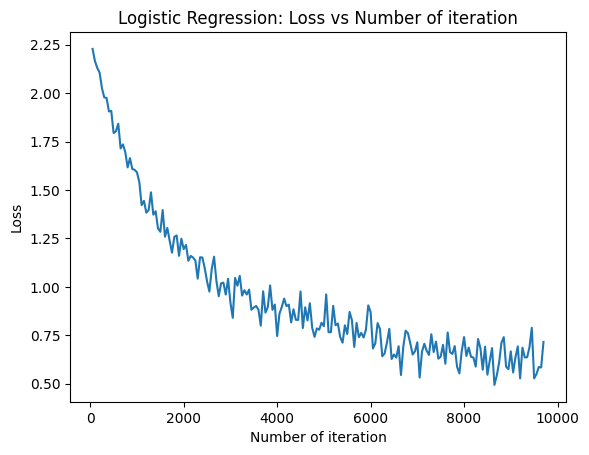

In [5]:
# visualization
plt.plot(iteration_list,loss_list)
plt.xlabel("Number of iteration")
plt.ylabel("Loss")
plt.title("Logistic Regression: Loss vs Number of iteration")
plt.show()